# Análise preditiva de reconhecimento de atividades humanas

Utilizando modelos clássicos de machine learning para a predição de práticas de atividade a partir de dados de smartphone.

Modelos analisados:
* Regressão logística 
* Árvore de classificação

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando e definindo os conjuntos de dados

In [3]:
#Importando os conjuntos de treinamento e de teste do diretório de trabalho atual
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [4]:
#Separando do conjunto de treino em target e features 
y_treino = treino.Activity
X_treino = treino.drop(['subject', 'Activity'], axis=1)

#Separando os conjuntos de teste em target e features
y_teste = teste.Activity
X_teste = teste.drop(['subject', 'Activity'], axis=1)

### **Regressão logística**
---

* Treinando o modelo de regressão logística no conjunto de treino

In [5]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight = 'balanced')
log_model.fit(X_treino, y_treino)

c:\Users\maria\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

* Avaliando a performance do modelo treinado

In [6]:
from sklearn.metrics import classification_report

# Usando o modelo para predizer a atividade (a feature) no conjunto de dados de teste
y_pred_log = log_model.predict(X_teste)

# Obtendo a performance do modelo
print(classification_report(y_teste, y_pred_log))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



* Imprimindo a matriz de confusão

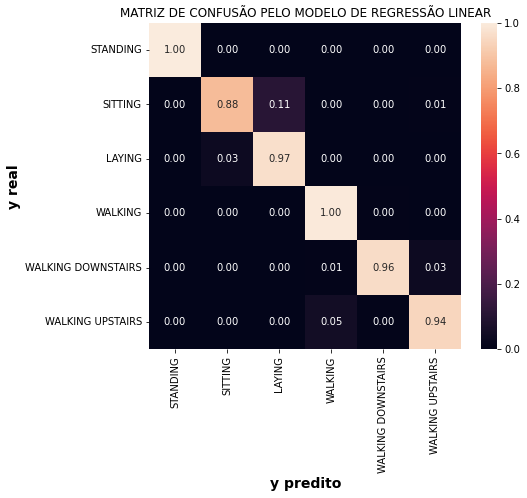

In [7]:
from sklearn.metrics import confusion_matrix


# Obtendo a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred_log)

# Normalizando a matriz de confusão
matriz_confusao = matriz_confusao.astype('float')
matriz_total = matriz_confusao.sum(axis=1)

matriz_norma = matriz_confusao/matriz_total 

# Selecionando e formatando os nomes das targets  
target_names = treino['Activity'].unique().astype(list)
target_names = [s.replace('_',' ') for s in target_names]

# Plotagem da matriz de confusão normalizada
plt.figure(figsize=(7,6))
sns.heatmap(matriz_norma, annot=True, fmt='.2f', xticklabels = target_names, yticklabels = target_names)
plt.title('Matriz de confusão pelo modelo de Regressão Linear'.upper())
plt.xlabel('y predito', fontsize = 14, fontweight=1000)
plt.ylabel('y real', fontsize = 14, fontweight=1000)
plt.show()

O modelo de regressão logística apresentou bom desempenho.  
As práticas 'estar em pé' e 'caminhando' não foram confundidas com as demais atividade.   
As atividades 'caminhando descendo escadas' e 'caminhando subindo escadas' foram pouco confundidas entre si. 

### **Árvore de classificação**
---

* Treinando o modelo de árvore de classificação no conjunto de treino

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5)

* Avaliando a performance do modelo treinado

In [9]:
# Usando o modelo para predizer a atividade (a feature) no conjunto de dados de teste
y_pred_tree = tree.predict(X_teste)

# Obtendo a performance do modelo
print(classification_report(y_teste, y_pred_tree))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.81      0.80       491
          STANDING       0.82      0.79      0.80       532
           WALKING       0.78      0.95      0.85       496
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947



* Imprimindo a matriz de confusão

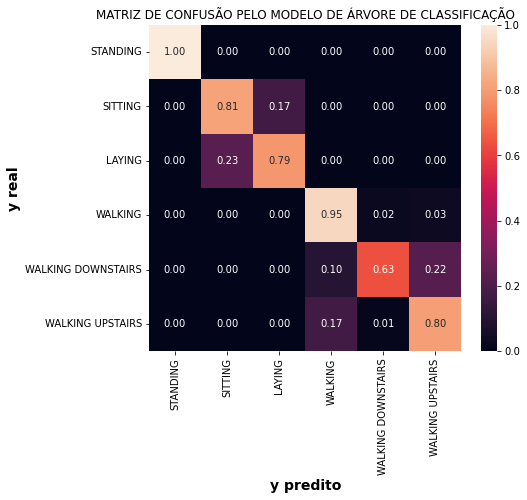

In [10]:
# Obtendo a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred_tree)

# Normalizando a matriz de confusão
matriz_confusao = matriz_confusao.astype('float')
matriz_total = matriz_confusao.sum(axis=1)

matriz_norma = matriz_confusao/matriz_total 

# Selecionando e formatando os nomes das targets  
target_names = treino['Activity'].unique().astype(list)
target_names = [s.replace('_',' ') for s in target_names]

# Plotagem da matriz de confusão normalizada
plt.figure(figsize=(7,6))
sns.heatmap(matriz_norma, annot=True, fmt='.2f', xticklabels = target_names, yticklabels = target_names)
plt.title('Matriz de confusão pelo modelo de Árvore de Classificação'.upper())
plt.xlabel('y predito', fontsize = 14, fontweight=1000)
plt.ylabel('y real', fontsize = 14, fontweight=1000)
plt.show()

Em relação ao modelo de regressão logística, o modelo de árvore de classificação foi menos assertivo.  
E, assim como no modelo de regressão logística, a atividade 'estar em pé' foi bem predita. Pois, ela não foi confundida com nenhuma outra atividade.  
As atividades 'caminhando' foram mais confundidas entre si.

### **Comparando as performances dos modelos de regressão logística e árvore de classificação**
---  

In [11]:
#Cálculo das acurácias do modelo de regressão logística treinado  
acc_log_treino = round(log_model.score(X_treino, y_treino) * 100, 2)
acc_log_teste = round(log_model.score(X_teste, y_teste) * 100, 2)

In [12]:
#Cálculo das acurácias do modelo de árvore de classificação treinado  
acc_tree_treino = round(tree.score(X_treino, y_treino) * 100, 2)
acc_tree_teste = round(tree.score(X_teste, y_teste) * 100, 2)

In [13]:
info=[[acc_log_treino, acc_log_teste],
      [acc_tree_treino, acc_tree_teste]]
columns_labels=["Acurácia de treino (%)", "Acurácia de teste (%)"]
index_labels=["Regressão logística", "Árvore de classificação"]
df=pd.DataFrame(info, columns=columns_labels, index=index_labels)
df

,Acurácia de treino (%),Acurácia de teste (%)
Regressão logística,99.05,95.79
Árvore de classificação,92.04,83.81
